# 预测数值型数据：回归

## 1.1 用线性回归找到最佳拟合曲线

In [3]:
from numpy import *

def loadDataSet(fileName):
    '''导入文件，返回X和y'''
    # 特征维数
    numFeat = len(open(fileName).readline().split('\t')) - 1
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        # strip 去除字符串头尾的 white space char
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

#### 回归系数 $\hat{w}^*=(X^T{}X)^{-1}X^T{}y$

In [7]:
def standRegres(xArr, yArr):
    xMat = mat(xArr); yMat = mat(yArr).T
    xTx = xMat.T * xMat
    if linalg.det(xTx) == 0.0:
        # 要求矩阵满秩或正定
        print("This matrix is singular, cannot do inverse")
        return
    # ws = linalg.solve(xTx, xMat.T * yMat)
    ws = xTx.I * (xMat.T * yMat)
    return ws

In [8]:
xArr, yArr = loadDataSet('./data/ex0.txt')
ws = standRegres(xArr, yArr)
print(ws)

[[ 3.00774324]
 [ 1.69532264]]


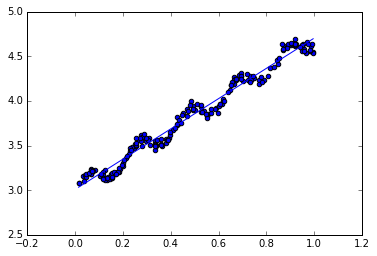

In [9]:
xMat = mat(xArr); yMat = mat(yArr)
yHat = xMat*ws
import matplotlib.pyplot as plt
%matplotlib inline  
fig = plt.figure()
ax = fig.add_subplot(111)
# .A numpy.matrixlib.defmatrix.matrix --> numpy.ndarray
# 第一列是偏移1
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0])
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy*ws
ax.plot(xCopy[:, 1], yHat)
plt.show()

## 1.2 岭回归

#### 加正则化项 $\lambda{}||w||^2$, 回归系数 $\hat{w}=(X^T{}X+\lambda{}I)^{-1}X^T{}y$
#### "岭"形容单位矩阵 $I$ 中的对角线